In [1]:
from pathlib import Path
from pyexplain.benchmark.file_utils import *
from pyexplain.benchmark.plot import *
import IPython
import numpy as np
import pandas as pd
import matplotlib
from collections import Counter
pd.set_option('display.max_rows', 100)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.weight']= 'bold'

In [2]:
# MAC
environment = 'MAC'
BASE_MAC_LINUX = {
    'MAC': '/Users/emiliogamba/Documents/01_VUB/01_Research/01_Shared_Projects',
    'LINUX': '/home/emilio/research/'
}

PATH_FIGURES_POST_PAPER = Path(BASE_MAC_LINUX[environment] + "01_holygrail/latex/journal/jair21/figures/")
EXPERIMENT_RESULTS = Path(BASE_MAC_LINUX[environment] + "06_HPC_Experiments/experiments/data/output/")
BASE_OUTPUT_PATH = BASE_MAC_LINUX[environment] + "/06_HPC_Experiments/experiments/data/output/"
REMOTE_EXPERIMENT_RESULTS = "/data/brussel/101/vsc10143/hpc_experiments2/experiments/data/output/"

Research QUestions:
-------------------------

Q1 What is the effect of requiring optimality of the generated MUSs on the quality of the generate explanations ?

Q2 Does re-use of information across the different iterations improve efficiency?

Q3 Which domain-specific Correction Subset method improves the overall runtime?

    (a) How does extraction multiple correction subsets affect runtime ?

Q4 What is the efficiency of a single step O(C)US and is single step sufficiently efficient for an interactive context? 

    (a) From an incremental (random explanation?) solving point of view ?
    (b) From an instantaneous(time-to-first) explanation point of view ?

In [3]:
mapping_expl_config = {
    'OCUS': 'OCUS+Incr. HS',
    'OCUS_NOT_INCREMENTAL': 'OCUS',
    'OUS_INCREMENTAL_NAIVE': 'OUSb+Lit. Incr. HS',
    'OUS_INCREMENTAL_NAIVE_PARALLEL': 'OUS Iter.+Lit. Incr. HS',
    'OUS_NAIVE_PARALLEL': 'OUS Iter',
    'OUS_SS' : 'OUSb',
    'MUS': 'MUS'
}

## (RQ2)  Does re-use of information across the different iterations improve efficiency?


Checking if Incrementality helps in improving explanation sequence generation 

Results are:
    
    # Demystify puzzles
    "RQ3_DEMYSTIFY_PUZZLES/2022021717/"
    "RQ3_LOGIC_SUDOKU_PUZZLES/2022021717/",
    "MUS/2022022111"

In [4]:
all_sat_folders = [
    "RQ3_DEMYSTIFY_PUZZLES/2022021717/",
    "RQ3_DEMYSTIFY_PUZZLES/2022030117/",
    "RQ3_LOGIC_SUDOKU_PUZZLES/2022021717/",
    "MUS/2022030116"
]

path_sat_output_dirs = [BASE_OUTPUT_PATH + o for o in all_sat_folders]

df_all_sat = folder_to_pandas_df_pickle(path_sat_output_dirs)

df_sat_ignored_instances = corr_enhance_df(df_all_sat)

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}
df_sat_ignored_instances["explanation config"] = df_sat_ignored_instances.apply(lambda row: renaming_expl_config[row["params_explanation_computer"]], axis=1)
df_sat_ignored_instances["HS"] = df_sat_ignored_instances.apply(lambda row: row["tot_n_hs"], axis=1)
df_sat_ignored_instances["tot_lits_derived"] = df_sat_ignored_instances.apply(lambda row: sum(row["lits_derived"]), axis=1)
display(df_sat_ignored_instances.groupby(by=["explanation config"]).count())


/home/emilio/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/emilio/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,time_totalTime,time_timeout,time_timedout,time_explain,time_cumul_explain,time_preprocess,time_opt,time_sat,time_grow,time_disj_mcs,...,avg_n_hs_disj_mcs,renamed_explanation_config,avg_t_explain,max_t_explain,min_t_explain,n_expls,%time_remaining_ocus,corr_explanation_config,incremental,HS
explanation config,,,,,,,,,,,,,,,,,,,,,
MUS,403,403,403,403,403,403,403,403,403,403,...,403,403,389,403,403,403,403,403,403,403
OCUS,403,403,403,403,403,403,403,403,403,403,...,403,403,399,403,403,403,403,403,403,403
OCUS+Incr. HS,403,403,403,403,403,403,403,403,403,403,...,403,403,397,403,403,403,403,403,403,403
OUS Iter.,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
OUS Iter.+Lit. Incr. HS,403,403,403,403,403,403,403,403,403,403,...,403,403,402,403,403,403,403,403,403,403
OUSb,403,403,403,403,403,403,403,403,403,403,...,403,403,315,403,403,403,403,403,403,403
OUSb+Lit. Incr. HS,403,403,403,403,403,403,403,403,403,403,...,403,403,315,403,403,403,403,403,403,403


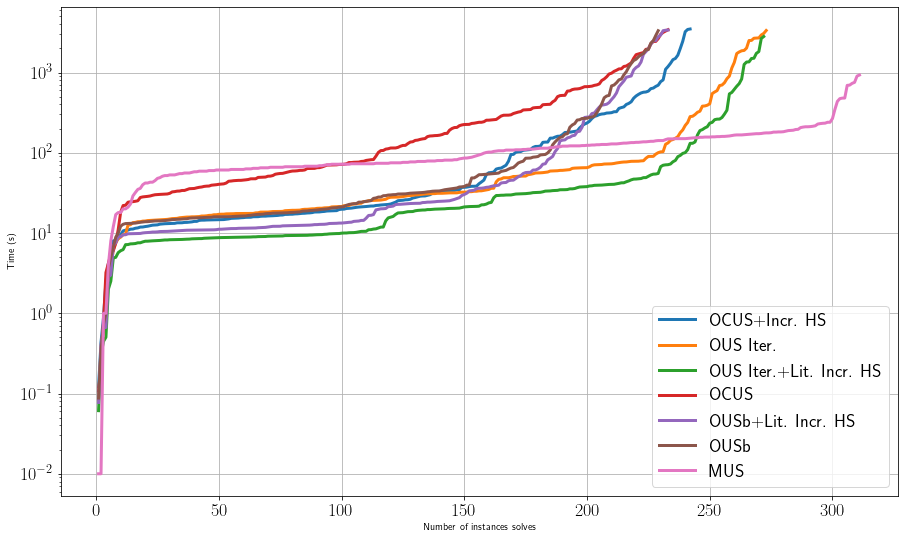

In [8]:
from collections import defaultdict
plt.figure(figsize=(15, 9))

for conf in set(df_sat_ignored_instances["explanation config"]):
    time_instances = sorted(list(df_sat_ignored_instances[
        (df_sat_ignored_instances["time_timedout"] == 0) & 
        (df_sat_ignored_instances["explanation config"] == conf)
    ]["time_totalTime"]))
    plt.plot(range(1, len(time_instances)+1), time_instances, label=conf, linewidth=3)
plt.legend(fontsize=18, loc='lower right')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.grid()
plt.ylabel("Time (s)")
plt.xlabel("Number of instances solves")
plt.savefig(PATH_FIGURES_POST_PAPER / f"{datetime.now().strftime(f'rq2_cactus_incrementality_%Y_%m_%d')}.pdf")

Check if the data is correctly generated (all configs have been executed with all configurations)

## (RQ2)  Does re-use of information across the different iterations improve efficiency?